## 1. Import Libraries and Dependencies

In [289]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
%matplotlib inline


## 2. Create a Path to the File Using Pathlib.

In [290]:
# Set the file paths to the CSVs using the Path class from the pathlib library
msft_csv_path = Path('../Resources/MSFT.csv')
sp500_csv_path = Path('../Resources/SP500.csv')

## 3. Read the CSV into a Pandas DataFrame.

In [291]:
# Read the ice cream sales data, set the `date` as the index
msft = pd.read_csv(msft_csv_path, header=0)
sp = pd.read_csv(sp500_csv_path, header=0)

## 4. Combine the DataFrames

In [292]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Month`)
combined = pd.concat([msft, sp], axis='columns', join='inner')
print(combined)

         date    close    volume   open   high    low     date        close
0      8/3/09  23.8300  46843710  23.82  23.86  23.50  5/20/14  1872.829956
1      8/4/09  23.7700  49116380  23.68  23.79  23.53  5/21/14  1888.030029
2      8/5/09  23.8100  53263040  23.84  24.25  23.79  5/22/14  1892.489990
3      8/6/09  23.4600  59655950  23.93  23.98  23.27  5/23/14  1900.530029
4      8/7/09  23.5600  46165010  23.75  23.82  23.50  5/27/14  1911.910034
...       ...      ...       ...    ...    ...    ...      ...          ...
1253  7/25/14  44.5000  26700810  44.30  44.66  44.30  5/13/19  2811.870117
1254  7/28/14  43.9700  29650540  44.36  44.51  43.93  5/14/19  2834.409912
1255  7/29/14  43.8850  27755840  43.91  44.09  43.64  5/15/19  2850.959961
1256  7/30/14  43.5785  31918500  44.07  44.10  43.29  5/16/19  2876.320068
1257  7/31/14  43.1600  31527670  43.38  43.69  43.08  5/17/19  2859.530029

[1258 rows x 8 columns]


## 5. Drop Extra Columns

In [293]:
# Drop the extra columns from the DataFrame
important_columns = ['close']
for column in combined.columns.drop_duplicates():
    if(column not in important_columns):
        combined.drop(column, axis=1, inplace=True)
print(combined)


        close        close
0     23.8300  1872.829956
1     23.7700  1888.030029
2     23.8100  1892.489990
3     23.4600  1900.530029
4     23.5600  1911.910034
...       ...          ...
1253  44.5000  2811.870117
1254  43.9700  2834.409912
1255  43.8850  2850.959961
1256  43.5785  2876.320068
1257  43.1600  2859.530029

[1258 rows x 2 columns]


## 6. Rename Columns

In [294]:
# Rename the columns by modifying the columns DataFrame attribute
combined.columns=['msft','sp']
print(combined)

         msft           sp
0     23.8300  1872.829956
1     23.7700  1888.030029
2     23.8100  1892.489990
3     23.4600  1900.530029
4     23.5600  1911.910034
...       ...          ...
1253  44.5000  2811.870117
1254  43.9700  2834.409912
1255  43.8850  2850.959961
1256  43.5785  2876.320068
1257  43.1600  2859.530029

[1258 rows x 2 columns]


## 7. Plot the Price Trends

<AxesSubplot:>

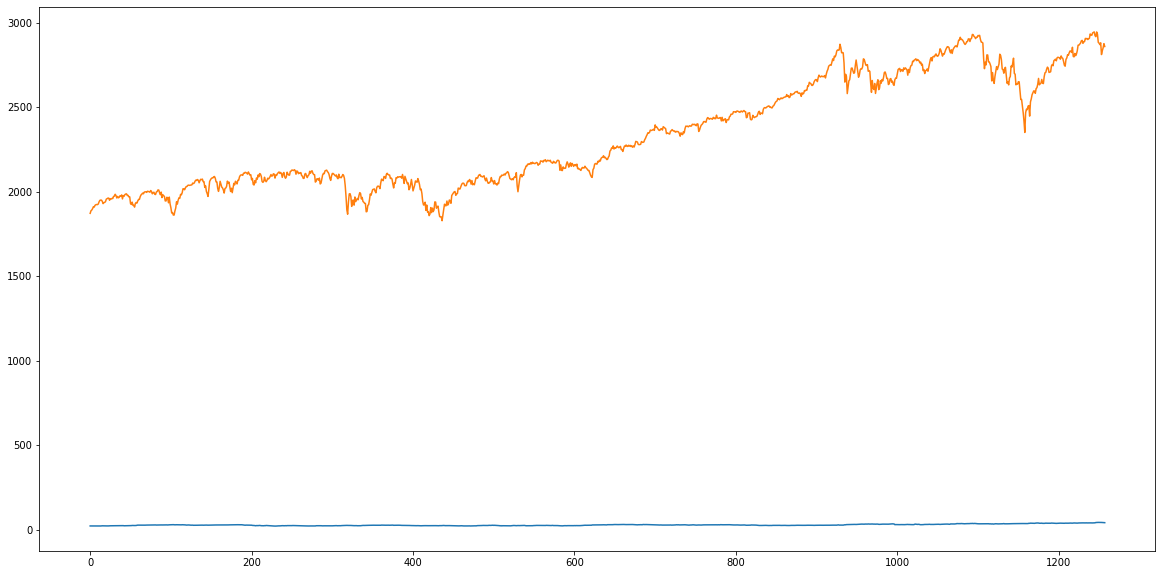

In [295]:
# Plot the data trends of the two variables over time
ax = combined['msft'].plot(figsize=[20,10])
combined['sp'].plot(ax=ax)

## 8. Plot Price Relationships

<AxesSubplot:xlabel='msft', ylabel='sp'>

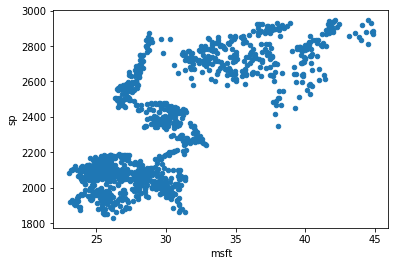

In [296]:
# Plot the relationship between the two variables
combined.plot(kind='scatter', x='msft', y='sp')

## 9. Calculate Correlation of Prices

In [297]:
# Calculate the correlation of closing prices between MSFT and SP500
correlation = combined.corr()

## 10. Plot Correlation of Prices

<AxesSubplot:>

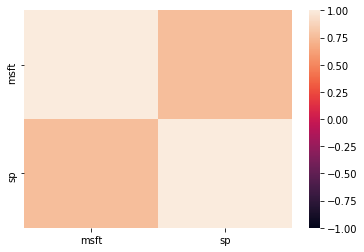

In [298]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1)

## 11. Calculate Daily Returns

In [299]:
# Use the `pct_change` function to calculate the daily returns for MSFT and SP500
daily_returns = combined.pct_change().dropna()
print(daily_returns)

          msft        sp
1    -0.002518  0.008116
2     0.001683  0.002362
3    -0.014700  0.004248
4     0.004263  0.005988
5    -0.005942 -0.001114
...        ...       ...
1253  0.002252 -0.024131
1254 -0.011910  0.008016
1255 -0.001933  0.005839
1256 -0.006984  0.008895
1257 -0.009603 -0.005837

[1257 rows x 2 columns]


## 12. Calculate Daily Return Trends

<AxesSubplot:>

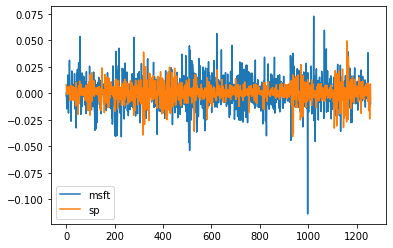

In [300]:
# Plot the daily returns of MSFT and SP500
daily_returns.plot()

## 13. Calculate Daily Return Relationships

KeyError: "None of [Float64Index([-0.0025178346621904657,  0.0016827934371055342,\n               -0.014699706005879776,   0.004262574595055302,\n               -0.005942275042444711,   -0.01238257899231443,\n                 0.01729355814958944,   0.003824904377390581,\n               0.0030482641828957213,   -0.01865608644268113,\n              ...\n                0.003593083314619383,   0.003244573730140976,\n               -0.000111520017843314,  0.0008922596475573474,\n               -0.010474704702473803,  0.0022522522522523403,\n                -0.01191011235955064, -0.0019331362292471788,\n               -0.006984163153697209,  -0.009603359454777083],\n             dtype='float64', length=1257)] are in the [columns]"

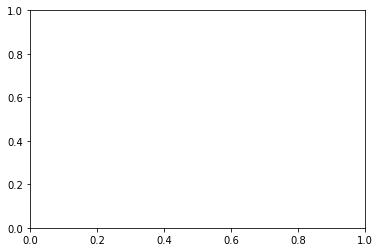

In [301]:
# Plot the relationship between the two variables
combined.plot(kind='scatter', x=daily_returns['msft'], y=daily_returns['sp'])

## 14. Calculate Correlation of Daily Returns

In [ ]:
# Calculate the correlation between each column


## 15. Plot Correlation of Daily Returns

In [ ]:
# Use the `heatmap` function from the seaborn library to visualize correlations
